In [2]:
import numpy as np
import pandas as pd


# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.ticker as ticker
import seaborn as sns

# Preprocesado y modelado
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_blobs
from sklearn.metrics import euclidean_distances
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Ridge

from skopt.space import Real, Integer
from skopt.utils import use_named_args
from skopt import gp_minimize
from skopt.plots import plot_convergence

# Varios
# ------------------------------------------------------------------------------
import multiprocessing
from itertools import product
import random

In [3]:
props = pd.read_excel("props.xlsx")

In [4]:
props

,id,barrio,habitaciones,banios,sup_total,sup_cubierta,precio,subte < 1,Asentamiento < 2,Precio M2,...,apto profesional,aire acon,a estrenar,reciclado,a remodelar,dependencia,Escritorio,Apto Credito,En pozo,Luminoso
0,24910,Palermo,4,4,401,400,4000000,1,0,2840,...,0,0,0,0,0,1,0,0,0,0
1,10407,Palermo,5,2,400,200,4000000,0,0,2840,...,0,0,0,0,0,1,1,0,0,0
2,34894,Palermo,4,3,393,378,4000000,1,0,2840,...,0,0,0,0,0,1,1,0,0,0
3,39660,Belgrano,5,4,370,250,4000000,0,0,2700,...,0,1,0,0,0,1,0,0,0,1
4,51305,Palermo,5,3,311,290,4000000,0,0,2840,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36748,17958,Flores,2,1,27,27,30000,1,1,1745,...,0,0,0,0,0,0,1,1,0,0
36749,40235,San Nicolás,1,1,15,15,30000,1,0,1950,...,0,0,0,0,0,0,0,0,0,0
36750,13497,Flores,1,1,38,38,28000,0,0,1745,...,0,0,1,0,0,0,0,1,0,0
36751,41846,Parque Chacabuco,1,1,40,37,70840,1,1,1771,...,0,1,0,0,0,0,1,1,0,0


In [5]:
props = props.drop(['id'],axis=1)

In [6]:
props

,barrio,habitaciones,banios,sup_total,sup_cubierta,precio,subte < 1,Asentamiento < 2,Precio M2,cochera,...,apto profesional,aire acon,a estrenar,reciclado,a remodelar,dependencia,Escritorio,Apto Credito,En pozo,Luminoso
0,Palermo,4,4,401,400,4000000,1,0,2840,1,...,0,0,0,0,0,1,0,0,0,0
1,Palermo,5,2,400,200,4000000,0,0,2840,1,...,0,0,0,0,0,1,1,0,0,0
2,Palermo,4,3,393,378,4000000,1,0,2840,1,...,0,0,0,0,0,1,1,0,0,0
3,Belgrano,5,4,370,250,4000000,0,0,2700,1,...,0,1,0,0,0,1,0,0,0,1
4,Palermo,5,3,311,290,4000000,0,0,2840,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36748,Flores,2,1,27,27,30000,1,1,1745,0,...,0,0,0,0,0,0,1,1,0,0
36749,San Nicolás,1,1,15,15,30000,1,0,1950,0,...,0,0,0,0,0,0,0,0,0,0
36750,Flores,1,1,38,38,28000,0,0,1745,0,...,0,0,1,0,0,0,0,1,0,0
36751,Parque Chacabuco,1,1,40,37,70840,1,1,1771,1,...,0,1,0,0,0,0,1,1,0,0


In [85]:
# Analisis exploratorio de datos. Cabe aclarar que anteriormente se realizo text mining con la descripcion de la publicación, es por ello, que existen variables dummy.

props.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36753 entries, 0 to 36752
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   barrio            36753 non-null  object
 1   habitaciones      36753 non-null  int64 
 2   banios            36753 non-null  int64 
 3   sup_total         36753 non-null  int64 
 4   sup_cubierta      36753 non-null  int64 
 5   precio            36753 non-null  int64 
 6   subte < 1         36753 non-null  int64 
 7   Asentamiento < 2  36753 non-null  int64 
 8   Precio M2         36753 non-null  int64 
 9   cochera           36753 non-null  int64 
 10  pile              36753 non-null  int64 
 11  baño completo     36753 non-null  int64 
 12  Balcón            36753 non-null  int64 
 13  parri             36753 non-null  int64 
 14  sum               36753 non-null  int64 
 15  suite             36753 non-null  int64 
 16  terraza patio     36753 non-null  int64 
 17  contrafrente

In [1]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(6, 6))
sns.distplot(
    props.precio,
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[0]
)
axes[0].set_title("Distribución original", fontsize = 'medium')
axes[0].set_xlabel('precio', fontsize='small') 
axes[0].tick_params(labelsize = 6)

sns.distplot(
    np.sqrt(props.precio),
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[1]
)
axes[1].set_title("Transformación raíz cuadrada", fontsize = 'medium')
axes[1].set_xlabel('sqrt(precio)', fontsize='small') 
axes[1].tick_params(labelsize = 6)

sns.distplot(
    np.log(props.precio),
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[2]
)
axes[2].set_title("Transformación logarítmica", fontsize = 'medium')
axes[2].set_xlabel('log(precio)', fontsize='small') 
axes[2].tick_params(labelsize = 6)

fig.tight_layout()

NameError: name 'plt' is not defined

In [54]:
props.select_dtypes(include=['float64', 'int64']).describe()

,habitaciones,banios,sup_total,sup_cubierta,precio,subte < 1,Asentamiento < 2,Precio M2,cochera,pile,...,apto profesional,aire acon,a estrenar,reciclado,a remodelar,dependencia,Escritorio,Apto Credito,En pozo,Luminoso
count,36753.000000,36753.000000,36753.000000,36753.000000,3.675300e+04,36753.000000,36753.000000,36753.000000,36753.000000,36753.000000,...,36753.000000,36753.000000,36753.000000,36753.000000,36753.000000,36753.000000,36753.000000,36753.000000,36753.000000,36753.000000
mean,2.520066,1.400375,78.025413,69.547520,2.219693e+05,0.763312,0.027508,2257.183005,0.395968,0.241314,...,0.311049,0.251789,0.130683,0.074905,0.012189,0.299159,0.253095,0.286154,0.025712,0.528909
std,1.149348,0.703702,55.066100,48.497282,2.387750e+05,0.425055,0.163560,410.007648,0.489064,0.427886,...,0.462929,0.434047,0.337058,0.263242,0.109733,0.457896,0.434791,0.451968,0.158277,0.499170
min,1.000000,1.000000,13.000000,13.000000,2.800000e+04,0.000000,0.000000,1314.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,43.000000,40.000000,1.100000e+05,1.000000,0.000000,1930.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,1.000000,63.000000,56.000000,1.550000e+05,1.000000,0.000000,2116.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,3.000000,2.000000,91.000000,81.000000,2.430000e+05,1.000000,0.000000,2700.000000,1.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,7.000000,5.000000,666.000000,651.000000,4.000000e+06,1.000000,1.000000,2840.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


{'whiskers': [<matplotlib.lines.Line2D at 0xa001a39088>,
 'caps': [<matplotlib.lines.Line2D at 0xa001a39948>,
 'boxes': [<matplotlib.lines.Line2D at 0xa05677f648>],
 'medians': [<matplotlib.lines.Line2D at 0xa001b7c4c8>],
 'fliers': [<matplotlib.lines.Line2D at 0xa00246e788>],
 'means': []}

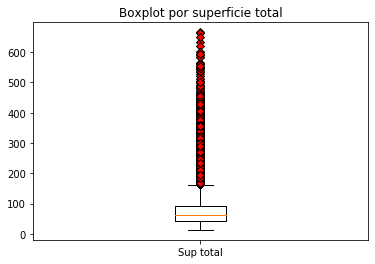

In [93]:
# Deteccion de anomalias

# Boxplot variable sup total

red_diamond = dict(markerfacecolor='r', marker='D')
fig, ax = plt.subplots()
ax.set_title('Boxplot por superficie total')
ax.boxplot(props['sup_total'], flierprops=red_diamond, labels=["Sup total"])

{'whiskers': [<matplotlib.lines.Line2D at 0xa001aeca08>,
 'caps': [<matplotlib.lines.Line2D at 0xa10fdc5288>,
 'boxes': [<matplotlib.lines.Line2D at 0xa0019ce208>],
 'medians': [<matplotlib.lines.Line2D at 0xa0558f6908>],
 'fliers': [<matplotlib.lines.Line2D at 0xa0558f6a48>],
 'means': []}

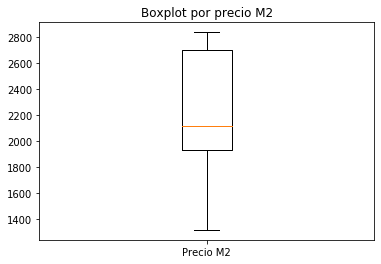

In [94]:
# Deteccion de anomalias

# Boxplot variable precio M2

red_diamond = dict(markerfacecolor='g', marker='D')
fig, ax = plt.subplots()
ax.set_title('Boxplot por precio M2')
ax.boxplot(props['Precio M2'], flierprops=red_diamond, labels=["Precio M2"])

In [60]:
# Matriz de correlaciones

def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matrix de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)



corr_matrix = props.select_dtypes(include=['float64', 'int64']).corr(method='pearson')
tidy_corr_matrix(corr_matrix).head(10)

,variable_1,variable_2,r,abs_r
83,sup_cubierta,sup_total,0.941148,0.941148
57,sup_total,sup_cubierta,0.941148,0.941148
85,sup_cubierta,precio,0.797108,0.797108
111,precio,sup_cubierta,0.797108,0.797108
110,precio,sup_total,0.796884,0.796884
58,sup_total,precio,0.796884,0.796884
3,habitaciones,sup_cubierta,0.721626,0.721626
81,sup_cubierta,habitaciones,0.721626,0.721626
2,habitaciones,sup_total,0.709099,0.709099
54,sup_total,habitaciones,0.709099,0.709099


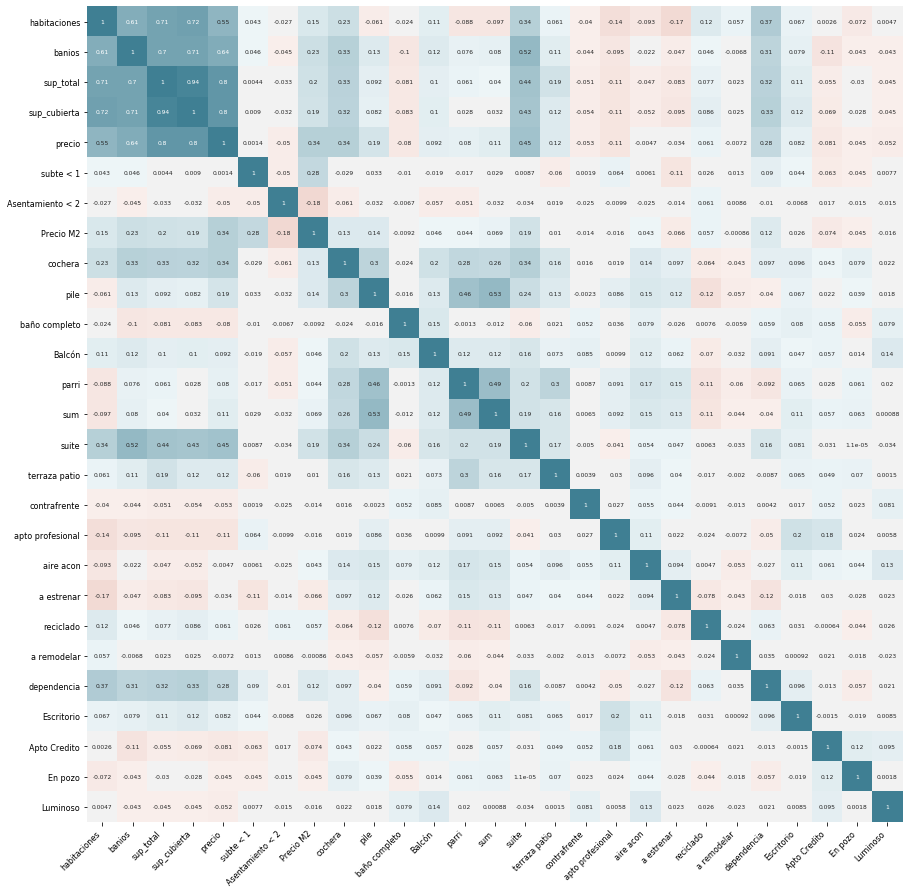

In [63]:
# Headmap correlaciones

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 15))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 6},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 8)

In [65]:
# Descriptiva de variable cualitativa Barrios. Palermo es la moda.

props.select_dtypes(include=['object']).describe()

,barrio
count,36753
unique,36
top,Palermo
freq,6818


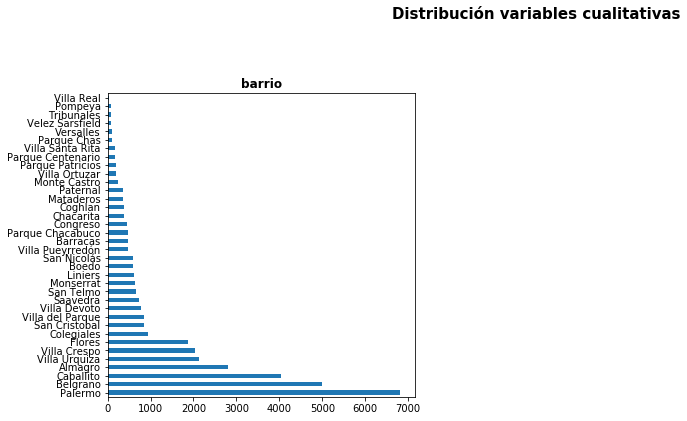

In [82]:
# GRafico Barrios

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
axes = axes.flat
columnas_object = props.select_dtypes(include=['object']).columns

for i, colum in enumerate(columnas_object):
    props[colum].value_counts().plot.barh(ax = axes[i])
    axes[i].set_title(colum, fontsize = 12, fontweight = "bold")
    axes[i].tick_params(labelsize = 10)
    axes[i].set_xlabel("")

# Se eliminan los axes vacíos
for i in [1, 2,3,4,5,6,7,8]:
    fig.delaxes(axes[i])
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Distribución variables cualitativas',
             fontsize = 15, fontweight = "bold");

In [84]:
# Valores ausentes. En este set de datos no hay, sino habria que imputarlos teniendo en cuenta la media de la variable u estimar su valor, o por ultimo, eliminar las observaciones o variables que no presenten valores. 

missing_Values= props.isnull().sum()
missing_Values

barrio              0
habitaciones        0
banios              0
sup_total           0
sup_cubierta        0
precio              0
subte < 1           0
Asentamiento < 2    0
Precio M2           0
cochera             0
pile                0
baño completo       0
Balcón              0
parri               0
sum                 0
suite               0
terraza patio       0
contrafrente        0
apto profesional    0
aire acon           0
a estrenar          0
reciclado           0
a remodelar         0
dependencia         0
Escritorio          0
Apto Credito        0
En pozo             0
Luminoso            0
dtype: int64

In [14]:
# Split de datos en train y test
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
                                        props.drop('precio', axis = 'columns'),
                                        props['precio'],
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [36]:
X_test

,barrio,habitaciones,banios,sup_total,sup_cubierta,subte < 1,Asentamiento < 2,Precio M2,cochera,pile,...,apto profesional,aire acon,a estrenar,reciclado,a remodelar,dependencia,Escritorio,Apto Credito,En pozo,Luminoso
25425,Villa Real,2,1,45,42,0,0,1730,1,0,...,1,0,1,0,0,0,0,1,0,1
3679,Caballito,4,2,230,210,1,0,2350,1,0,...,1,0,0,1,0,1,0,1,0,0
36510,Chacarita,1,1,25,25,1,0,2002,0,0,...,1,0,0,0,0,0,1,0,0,0
16631,Saavedra,2,2,64,52,0,0,1995,0,0,...,0,1,0,0,0,0,1,0,0,1
19023,Colegiales,2,1,58,50,1,0,2356,0,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16857,San Cristobal,3,1,92,92,1,0,1779,0,0,...,1,0,0,0,0,1,1,0,0,1
9927,Villa Urquiza,2,2,66,61,1,0,2100,0,0,...,0,0,0,0,0,1,0,0,0,1
8455,Flores,2,2,120,75,1,0,1745,0,0,...,0,0,0,0,0,0,0,0,0,0
10731,Palermo,2,1,61,57,1,0,2840,0,0,...,1,1,0,0,0,0,0,0,0,1


In [7]:
props.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36753 entries, 0 to 36752
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   barrio            36753 non-null  object
 1   habitaciones      36753 non-null  int64 
 2   banios            36753 non-null  int64 
 3   sup_total         36753 non-null  int64 
 4   sup_cubierta      36753 non-null  int64 
 5   precio            36753 non-null  int64 
 6   subte < 1         36753 non-null  int64 
 7   Asentamiento < 2  36753 non-null  int64 
 8   Precio M2         36753 non-null  int64 
 9   cochera           36753 non-null  int64 
 10  pile              36753 non-null  int64 
 11  baño completo     36753 non-null  int64 
 12  Balcón            36753 non-null  int64 
 13  parri             36753 non-null  int64 
 14  sum               36753 non-null  int64 
 15  suite             36753 non-null  int64 
 16  terraza patio     36753 non-null  int64 
 17  contrafrente

In [16]:
# Pipeline para aplicar de forma secuencial las transformaciones en las variables

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_selector

numeric_cols = X_train.select_dtypes(include=['float64', 'int64']).columns.to_list()
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.to_list()

# Transformaciones para las variables numéricas
numeric_transformer = Pipeline(
                        steps=[
                            ('imputer', SimpleImputer(strategy='mean')),
                            ('scaler', StandardScaler())
                        ]
                      )


# Transformaciones para las variables categóricas
categorical_transformer = Pipeline(
                            steps=[
                                ('imputer', SimpleImputer(strategy='most_frequent')),
                                ('onehot', OneHotEncoder(handle_unknown='ignore'))
                            ]
                          )

preprocessor = ColumnTransformer(
                    transformers=[
                        ('numeric', numeric_transformer, numeric_cols),
                        ('cat', categorical_transformer, cat_cols)
                    ],
                    remainder='passthrough'
                )

In [17]:
X_train_prep = preprocessor.fit_transform(X_train)
X_test_prep  = preprocessor.transform(X_test)

In [18]:
# Convertir el output en dataframe y añadir el nombre de las columnas
# ------------------------------------------------------------------------------

encoded_cat = preprocessor.named_transformers_['cat']['onehot']\
              .get_feature_names(cat_cols)


In [19]:
encoded_cat

array(['barrio_Almagro', 'barrio_Barracas', 'barrio_Belgrano',
       'barrio_Boedo', 'barrio_Caballito', 'barrio_Chacarita',
       'barrio_Coghlan', 'barrio_Colegiales', 'barrio_Congreso',
       'barrio_Flores', 'barrio_Liniers', 'barrio_Mataderos',
       'barrio_Monserrat', 'barrio_Monte Castro', 'barrio_Palermo',
       'barrio_Parque Centenario', 'barrio_Parque Chacabuco',
       'barrio_Parque Chas', 'barrio_Parque Patricios', 'barrio_Paternal',
       'barrio_Pompeya', 'barrio_Saavedra', 'barrio_San Cristobal',
       'barrio_San Nicolás', 'barrio_San Telmo', 'barrio_Tribunales',
       'barrio_Velez Sarsfield', 'barrio_Versalles',
       'barrio_Villa Crespo', 'barrio_Villa Devoto',
       'barrio_Villa Ortuzar', 'barrio_Villa Pueyrredón',
       'barrio_Villa Real', 'barrio_Villa Santa Rita',
       'barrio_Villa Urquiza', 'barrio_Villa del Parque'], dtype=object)

In [20]:
numeric_cols

['habitaciones',
 'banios',
 'sup_total',
 'sup_cubierta',
 'subte < 1',
 'Asentamiento < 2',
 'Precio M2',
 'cochera',
 'pile',
 'baño completo',
 'Balcón',
 'parri',
 'sum',
 'suite',
 'terraza patio',
 'contrafrente',
 'apto profesional',
 'aire acon',
 'a estrenar',
 'reciclado',
 'a remodelar',
 'dependencia',
 'Escritorio',
 'Apto Credito',
 'En pozo',
 'Luminoso']

In [21]:
encoded_cat = preprocessor.named_transformers_['cat']['onehot']\
              .get_feature_names(cat_cols)


labels = np.concatenate([numeric_cols, encoded_cat])
datos_train_prep = preprocessor.transform(X_train)
datos_train_prep = pd.DataFrame(datos_train_prep, columns=labels)
datos_train_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29402 entries, 0 to 29401
Data columns (total 62 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   habitaciones              29402 non-null  float64
 1   banios                    29402 non-null  float64
 2   sup_total                 29402 non-null  float64
 3   sup_cubierta              29402 non-null  float64
 4   subte < 1                 29402 non-null  float64
 5   Asentamiento < 2          29402 non-null  float64
 6   Precio M2                 29402 non-null  float64
 7   cochera                   29402 non-null  float64
 8   pile                      29402 non-null  float64
 9   baño completo             29402 non-null  float64
 10  Balcón                    29402 non-null  float64
 11  parri                     29402 non-null  float64
 12  sum                       29402 non-null  float64
 13  suite                     29402 non-null  float64
 14  terraz

In [23]:
datos_train_prep

,habitaciones,banios,sup_total,sup_cubierta,subte < 1,Asentamiento < 2,Precio M2,cochera,pile,baño completo,...,barrio_Velez Sarsfield,barrio_Versalles,barrio_Villa Crespo,barrio_Villa Devoto,barrio_Villa Ortuzar,barrio_Villa Pueyrredón,barrio_Villa Real,barrio_Villa Santa Rita,barrio_Villa Urquiza,barrio_Villa del Parque
0,-1.319824,-0.571336,-0.854194,-0.878853,0.556372,-0.168741,0.241167,-0.813676,1.764297,-1.015010,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.420293,-0.571336,-0.088500,-0.133853,-1.797360,-0.168741,-1.911056,1.228990,-0.566798,-1.015010,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.160410,2.292843,2.810199,1.252675,0.556372,-0.168741,1.080582,-0.813676,-0.566798,-1.015010,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.290351,3.724932,0.950657,0.942258,0.556372,-0.168741,1.080582,1.228990,-0.566798,-1.015010,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-1.319824,-0.571336,-0.763040,-0.775381,0.556372,-0.168741,1.422205,-0.813676,1.764297,0.985212,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29397,-0.449766,-0.571336,-0.854194,-0.796075,0.556372,-0.168741,1.422205,-0.813676,-0.566798,-1.015010,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29398,0.420293,-0.571336,-0.325500,-0.195936,0.556372,-0.168741,-0.542125,-0.813676,-0.566798,-1.015010,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29399,0.420293,-0.571336,-0.416654,-0.361492,0.556372,-0.168741,-1.186328,1.228990,-0.566798,-1.015010,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29400,-0.449766,-0.571336,-0.544270,-0.713298,0.556372,-0.168741,-0.837385,-0.813676,-0.566798,-1.015010,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
# Implemento una regresión lineal 

from sklearn.linear_model import Ridge

# Identificación de columnas numéricas y categóricas
numeric_cols = X_train.select_dtypes(include=['float64', 'int']).columns.to_list()
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.to_list()


# Transformaciones para las variables numéricas
numeric_transformer = Pipeline(
                        steps=[('scaler', StandardScaler())]
                      )

# Transformaciones para las variables categóricas
categorical_transformer = Pipeline(
                            steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))]
                          )

preprocessor = ColumnTransformer(
                    transformers=[
                        ('numeric', numeric_transformer, numeric_cols),
                        ('cat', categorical_transformer, cat_cols)
                    ],
                    remainder='passthrough'
                )

In [42]:
pipe = Pipeline([('preprocessing', preprocessor),
                 ('modelo', Ridge())])

In [43]:
pipe.fit(X=X_train, y=y_train)

Pipeline(memory=None,
         steps=[('preprocessing',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('numeric',
                                                  Pipeline(memory=None,
                                                           steps=[('scaler',
                                                                   StandardScaler(copy=True,
                                                                                  with_mean=True,
                                                                                  with_std=True))],
                                                           verbose=False),
                                                  []),
                                                 ('cat',
                                                  Pipeline(memory

In [44]:
# Validacion cruzada en k=5

from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score

cv = RepeatedKFold(n_splits=5, n_repeats=5, random_state=123)
cv_scores = cross_val_score(
                estimator = pipe,
                X         = X_train,
                y         = y_train,
                scoring   = 'neg_root_mean_squared_error',
                cv        = cv
             )

print(f"Métricas de validación cruzada: {cv_scores}")
print("")
print(f"Média métricas de validación cruzada: {cv_scores.mean()}")

Métricas de validación cruzada: [-130722.7329111  -124763.44797338 -120919.85938261 -117917.07864407
 -137100.7305092  -120887.80926438 -124251.68789038 -127313.67726493
 -121959.6616922  -136644.58460079 -124235.35565136 -123070.85638157
 -117659.36168409 -138299.6644118  -128920.22776724 -120233.94598285
 -141248.16494618 -124939.75293383 -119766.98703132 -125827.38176644
 -132990.77614256 -121630.3257331  -118604.63836485 -125478.56984277
 -132980.72930807]

Média métricas de validación cruzada: -126334.72032324318


In [45]:
# Utilizo cross_validate porque me permite calcular varias metricas y arma un diccionario con los resultados

from sklearn.model_selection import cross_validate

cv = RepeatedKFold(n_splits=3, n_repeats=5, random_state=123)
cv_scores = cross_validate(
                estimator = pipe,
                X         = X_train,
                y         = y_train,
                scoring   = ('r2', 'neg_root_mean_squared_error'),
                cv        = cv,
                return_train_score = True
            )

# Se convierte el diccionario a dataframe para facilitar la visualización
cv_scores = pd.DataFrame(cv_scores)
cv_scores

,fit_time,score_time,test_r2,train_r2,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error
0,0.064040,0.030020,0.724705,0.716602,-129057.737393,-124702.026200
1,0.059928,0.015620,0.714040,0.720703,-116420.100072,-130973.025116
2,0.078127,0.015624,0.711288,0.723750,-134151.381785,-122091.294999
3,0.078128,0.015627,0.723738,0.717550,-125222.843171,-126602.485169
4,0.066699,0.010052,0.734412,0.712927,-117461.853577,-130308.856333
5,0.046869,0.015627,0.700353,0.730288,-135794.664368,-121081.426377
6,0.046880,0.015624,0.715063,0.721729,-128085.807832,-125209.571552
7,0.062501,0.015626,0.734447,0.712978,-116352.266265,-130824.769992
8,0.062505,0.015624,0.707078,0.726275,-134413.709608,-121894.249159
9,0.071047,0.020014,0.702539,0.728507,-132993.201521,-122634.788374


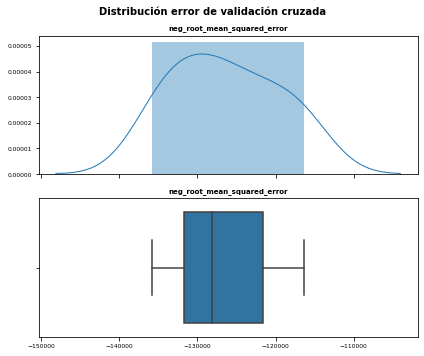

In [46]:
# Distribución del error de validación cruzada


fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(6, 5), sharex=True)

sns.distplot(
    cv_scores['test_neg_root_mean_squared_error'],
    hist    = True,
    rug     = False,
    kde_kws = {'shade': False, 'linewidth': 1},
    ax      = axes[0]
)
axes[0].set_title('neg_root_mean_squared_error', fontsize = 7, fontweight = "bold")
axes[0].tick_params(labelsize = 6)
axes[0].set_xlabel("")
    
sns.boxplot(
    cv_scores['test_neg_root_mean_squared_error'],
    ax      = axes[1]
)
axes[1].set_title('neg_root_mean_squared_error', fontsize = 7, fontweight = "bold")
axes[1].tick_params(labelsize = 6)
axes[1].set_xlabel("")


fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Distribución error de validación cruzada', fontsize = 10,
             fontweight = "bold");

In [47]:
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
import statsmodels.api as sm

# Validación cruzada
#-------------------------------------------------------------------------------
cv = KFold(n_splits=5, random_state=123, shuffle=True)
cv_prediccones = cross_val_predict(
                    estimator = pipe,
                    X         = X_train,
                    y         = y_train,
                    cv        = cv
                  )

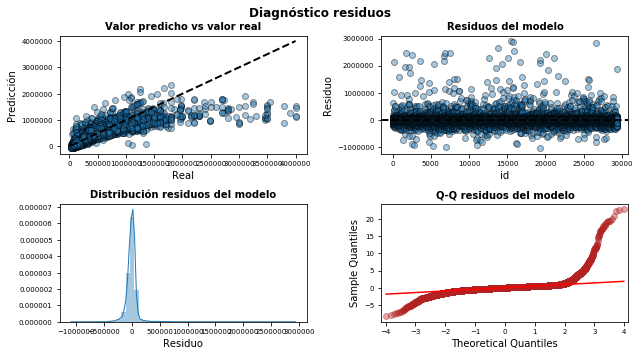

In [48]:

# Gráficos
#-------------------------------------------------------------------------------
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(9, 5))

axes[0, 0].scatter(y_train, cv_prediccones, edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],
                'k--', color = 'black', lw=2)
axes[0, 0].set_title('Valor predicho vs valor real', fontsize = 10, fontweight = "bold")
axes[0, 0].set_xlabel('Real')
axes[0, 0].set_ylabel('Predicción')
axes[0, 0].tick_params(labelsize = 7)

axes[0, 1].scatter(list(range(len(y_train))), y_train - cv_prediccones,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0, 1].set_title('Residuos del modelo', fontsize = 10, fontweight = "bold")
axes[0, 1].set_xlabel('id')
axes[0, 1].set_ylabel('Residuo')
axes[0, 1].tick_params(labelsize = 7)

sns.distplot(
    y_train - cv_prediccones,
    hist    = True,
    rug     = False,
    kde_kws = {'shade': False, 'linewidth': 1},
    ax      = axes[1, 0]
)
axes[1, 0].set_title('Distribución residuos del modelo', fontsize = 10,
                     fontweight = "bold")
axes[1, 0].set_xlabel("Residuo")
axes[1, 0].tick_params(labelsize = 7)


sm.qqplot(
    y_train - cv_prediccones,
    fit   = True,
    line  = 'q',
    ax    = axes[1, 1], 
    color = 'firebrick',
    alpha = 0.4,
    lw    = 2
)
axes[1, 1].set_title('Q-Q residuos del modelo', fontsize = 10, fontweight = "bold")
axes[1, 1].tick_params(labelsize = 7)

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Diagnóstico residuos', fontsize = 12, fontweight = "bold");

In [49]:
# Validación cruzada repetida paralelizada (multicore)

from sklearn.model_selection import RepeatedKFold

cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=123)
cv_scores = cross_val_score(
                estimator = pipe,
                X         = X_train,
                y         = y_train,
                scoring   = 'neg_root_mean_squared_error',
                cv        = cv,
                n_jobs    = -1 # todos los cores disponibles
             )

print(f"Média métricas de validación cruzada: {cv_scores.mean()}")

Média métricas de validación cruzada: -125947.95161200575


In [50]:
predic = pipe.predict(X_test)
predicciones = pd.DataFrame({'precio' : y_test, 'prediccion' : predic})
predicciones

,precio,prediccion
25425,120000,73664.812744
3679,390000,716628.026595
36510,51000,12982.907946
16631,168000,142684.602524
19023,150300,154062.424747
...,...,...
16857,165000,210116.970978
9927,235000,188665.118451
8455,252000,229231.708786
10731,225000,232227.591108


In [51]:
# Error cuadratico medio del testing

from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(
        y_true = y_test,
        y_pred = predic,
        squared = False
       )
rmse

# se estimó, mediante validación cruzada repetida, que el rmse del modelo era de 125947, un valor próximo al obtenido con el conjunto de test 127551.

127551.50037994717

In [23]:
# Tunning de hiperparametros con grid search

from sklearn.model_selection import GridSearchCV, RepeatedKFold
from sklearn.linear_model import Ridge

# Pipe: preprocesado + modelo
# ==============================================================================
# Identificación de columnas numéricas y catégoricas
numeric_cols = X_train.select_dtypes(include=['float64', 'int']).columns.to_list()
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.to_list()


# Transformaciones para las variables numéricas
numeric_transformer = Pipeline(
                        steps=[('scaler', StandardScaler())]
                      )

# Transformaciones para las variables categóricas
categorical_transformer = Pipeline(
                            steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))]
                          )

preprocessor = ColumnTransformer(
                    transformers=[
                        ('numeric', numeric_transformer, numeric_cols),
                        ('cat', categorical_transformer, cat_cols)
                    ],
                    remainder='passthrough'
                )

# Se combinan los pasos de preprocesado y el modelo en un mismo pipeline
pipe = Pipeline([('preprocessing', preprocessor),
                 ('modelo', Ridge())])

# Grid de hiperparámetros
# ==============================================================================
param_grid = {'modelo__alpha': np.logspace(-5, 3, 10)}

# Búsqueda por validación cruzada
# ==============================================================================
grid = GridSearchCV(
        estimator  = pipe,
        param_grid = param_grid,
        scoring    = 'neg_root_mean_squared_error',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = RepeatedKFold(n_splits = 5, n_repeats = 5), 
        verbose    = 0,
        return_train_score = True
       )

grid.fit(X = X_train, y = y_train)


GridSearchCV(cv=RepeatedKFold(n_repeats=5, n_splits=5, random_state=None),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('preprocessing',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='passthrough',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('numeric',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('scaler',
                                                                                          StandardScaler(copy=True,
                                                                                

In [24]:
# Resultados del grid
# ==============================================================================
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False)

,param_modelo__alpha,mean_test_score,std_test_score,mean_train_score,std_train_score
5,0.278256,-126189.982979,9768.433278,-126033.044642,2417.079761
6,2.15443,-126190.268901,9772.752857,-126037.607712,2417.151360
7,16.681,-126190.447007,9793.770135,-126050.144194,2417.573996
4,0.0359381,-126190.659232,9767.532670,-126032.748689,2417.075101
3,0.00464159,-126190.794043,9767.400760,-126032.742261,2417.074999
2,0.000599484,-126190.812479,9767.383407,-126032.742149,2417.074997
1,7.74264e-05,-126190.814877,9767.381161,-126032.742148,2417.074997
0,1e-05,-126190.815188,9767.380870,-126032.742148,2417.074997
8,129.155,-126243.531681,9879.546107,-126143.221512,2423.316439
9,1000,-126678.569355,10047.239506,-126656.206910,2445.046782


In [25]:
print("-----------------------------------")
print("Mejores hiperparámetros encontrados")
print("-----------------------------------")
print(grid.best_params_, ":", grid.best_score_, grid.scoring)

-----------------------------------
Mejores hiperparámetros encontrados
-----------------------------------
{'modelo__alpha': 0.2782559402207126} : -126189.98297917678 neg_root_mean_squared_error


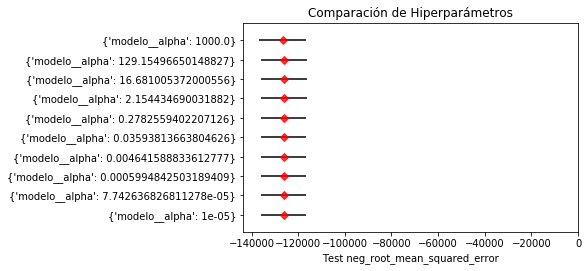

In [26]:
# Visualización grafica del error con los distintos valores de alpha y validación cruzada. En este caso, al ser muy similares no se puede apreciar una difrencia

fig, ax = plt.subplots(figsize=(6, 3.84))
ax.barh(
    [str(d) for d in resultados['params']],
    resultados['mean_test_score'],
    xerr=resultados['std_test_score'],
    align='center',
    alpha=0
)
ax.plot(
    resultados['mean_test_score'],
    [str(d) for d in resultados['params']],
    marker="D",
    linestyle="",
    alpha=0.8,
    color="r"
)
ax.set_title('Comparación de Hiperparámetros')
ax.set_xlabel('Test neg_root_mean_squared_error');

Text(0.5, 1.0, 'Distribución aleatoria')

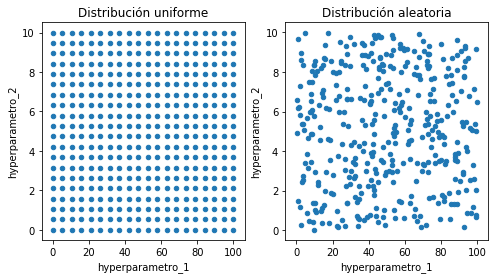

In [29]:
# Tunning de hiperparametros con random grid search

from itertools import product
import random

ig, axs = plt.subplots(nrows = 1, ncols = 2,figsize=(8, 4),
                        sharex = True, sharey = False)

# GRID EXHAUSTIVO
# ==============================================================================
hyperparametro_1 = np.linspace(start = 0, stop = 100, num=20)
hyperparametro_2 = np.linspace(start = 0, stop = 10, num=20)

# Lista con todas las combinaciones
combinaciones = [list(x) for x in product(hyperparametro_1, hyperparametro_2)]
combinaciones = pd.DataFrame.from_records(
                    combinaciones,
                    columns=['hyperparametro_1', 'hyperparametro_2']
                )

combinaciones.plot(
    x    = 'hyperparametro_1',
    y    = 'hyperparametro_2',
    kind = 'scatter',
    ax   = axs[0]
)
axs[0].set_title('Distribución uniforme')

# RANDOM GRID

hyperparametro_1 = np.random.uniform(low = 0, high = 100, size  = 400)
hyperparametro_2 = np.random.uniform(low = 0, high = 10, size  = 400)

combinaciones = pd.DataFrame(
                    {
                    'hyperparametro_1': hyperparametro_1,
                    'hyperparametro_2': hyperparametro_2,
                    }
                )
combinaciones.plot(
    x    = 'hyperparametro_1',
    y    = 'hyperparametro_2',
    kind = 'scatter',
    ax   = axs[1]
)
axs[1].set_title('Distribución aleatoria')

In [30]:
from sklearn.model_selection import RandomizedSearchCV, RepeatedKFold

# Espacio de búsqueda de cada hiperparámetro
# ==============================================================================
param_distributions = {'modelo__alpha': np.logspace(-5, 3, 100)}

# Búsqueda por validación cruzada
# ==============================================================================
grid = RandomizedSearchCV(
        estimator  = pipe,
        param_distributions = param_distributions,
        n_iter     = 50,
        scoring    = 'neg_root_mean_squared_error',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = RepeatedKFold(n_splits = 5, n_repeats = 5), 
        verbose    = 0,
        random_state = 123,
        return_train_score = True
       )

grid.fit(X = X_train, y = y_train)

# Resultados del grid
# ==============================================================================
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False)\
    .head(1)

,param_modelo__alpha,mean_test_score,std_test_score,mean_train_score,std_train_score
12,13.8489,-126219.221183,8772.671881,-126056.774286,2227.181976


In [31]:
# Otra alternativa para la busqueda de hiperparametros es la optimizacion bayesiana

from skopt.space import Real, Integer
from skopt.utils import use_named_args
from skopt import gp_minimize
from skopt.plots import plot_convergence

espacio_busqueda  = [Real(1e-6, 1e+3, "log-uniform", name='modelo__alpha')]

@use_named_args(espacio_busqueda)
def objective(**params):
    pipe.set_params(**params)
    return -np.mean(cross_val_score(pipe, X_train, y_train, cv=5, n_jobs=-1,
                                    scoring="neg_root_mean_squared_error"))

resultados_opt = gp_minimize(
                    func         = objective,
                    dimensions   = espacio_busqueda,
                    n_calls      = 50,
                    random_state = 0
                )

print(f"Mejor score validación: {resultados_opt.fun}")
print(f"Mejores hiperparámetros: {list(zip([x.name for x in espacio_busqueda], resultados_opt.x))}")

Mejor score validación: 126155.58931989053
Mejores hiperparámetros: [('modelo__alpha', 0.47739297915065304)]


In [32]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.compose import make_column_selector

# Pipe: preprocesado + modelo
# ==============================================================================
# Transformaciones para las variables numéricas
numeric_transformer = Pipeline(
                        steps=[('scaler', StandardScaler())]
                      )

# Transformaciones para las variables categóricas
categorical_transformer = Pipeline(
                            steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))]
                          )


preprocessor = ColumnTransformer(
                    transformers=[
                        ('numeric', numeric_transformer, make_column_selector(dtype_include=np.number)),
                        ('cat', categorical_transformer, make_column_selector(dtype_include='object'))
                    ],
                    remainder='passthrough'
                )

# Se combinan los pasos de preprocesado y el modelo en un mismo pipeline.
pipe = Pipeline(
        [('preprocessing', preprocessor),
        ('interactions', PolynomialFeatures(degree=2)),
        ('modelo', Ridge())])

# Grid de hiperparámetros
# ==============================================================================
param_grid = {'interactions': [PolynomialFeatures(degree=2), 'passthrough'],
              'modelo__alpha': np.logspace(-5, 3, 10)}

# Búsqueda por validación cruzada
# ==============================================================================
grid = GridSearchCV(
        estimator  = pipe,
        param_grid = param_grid,
        scoring    = 'neg_root_mean_squared_error',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = RepeatedKFold(n_splits = 5, n_repeats = 5), 
        verbose    = 0,
        return_train_score = True
       )

grid.fit(X = X_train, y = y_train)

# Resultados del grid
# ==============================================================================
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False)\
    .head(1)


,param_interactions,param_modelo__alpha,mean_test_score,std_test_score,mean_train_score,std_train_score
8,"PolynomialFeatures(degree=2, include_bias=True...",129.155,-99781.757618,8301.210431,-93700.911617,2056.081888


In [34]:
# Se observa que disminuyo considerablemente el error cuadrado medio. A continuación aplicare Random Forest

from sklearn.model_selection import RandomizedSearchCV, RepeatedKFold
from sklearn.ensemble import RandomForestRegressor

# Pipeline: preprocesado + modelo
# ==============================================================================
# Identificación de columnas numéricas y catégoricas
numeric_cols = X_train.select_dtypes(include=['float64', 'int64']).columns.to_list()
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.to_list()


# Transformaciones para las variables numéricas
numeric_transformer = Pipeline(
                        steps=[('scaler', StandardScaler())]
                      )

# Transformaciones para las variables categóricas
categorical_transformer = Pipeline(
                            steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))]
                          )

preprocessor = ColumnTransformer(
                    transformers=[
                        ('numeric', numeric_transformer, numeric_cols),
                        ('cat', categorical_transformer, cat_cols)
                    ],
                    remainder='passthrough'
                )

# Se combinan los pasos de preprocesado y el modelo en un mismo pipeline.
pipe = Pipeline([('preprocessing', preprocessor),
                 ('modelo', RandomForestRegressor())])

# Optimización de hiperparámetros

# Espacio de búsqueda de cada hiperparámetro
param_distributions = {'modelo__alpha': np.logspace(-5, 5, 500)}


param_distributions = {
    'modelo__n_estimators': [50, 100, 1000, 2000],
    'modelo__max_features': ["auto", 3, 5, 7],
    'modelo__max_depth'   : [None, 3, 5, 10, 20]
}

# Búsqueda random grid
grid = RandomizedSearchCV(
        estimator  = pipe,
        param_distributions = param_distributions,
        n_iter     = 20,
        scoring    = 'neg_root_mean_squared_error',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = RepeatedKFold(n_splits = 5, n_repeats = 3),
        refit      = True, 
        verbose    = 0,
        random_state = 123,
        return_train_score = True
       )

grid.fit(X = X_train, y = y_train)

# Resultados del grid

resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False)\
    .head(1)



,param_modelo__n_estimators,param_modelo__max_features,param_modelo__max_depth,mean_test_score,std_test_score,mean_train_score,std_train_score
15,2000,7,20,-87327.976673,10849.871291,-34779.775087,772.852887


In [38]:
# Error de test del modelo final

from sklearn.metrics import mean_squared_error

modelo_final = grid.best_estimator_
predicciones = modelo_final.predict(X = X_test)
rmse_rf = mean_squared_error(
            y_true  = y_test,
            y_pred  = predicciones,
            squared = False
          )
print(f"El error (rmse) de test es: {rmse_rf}")

El error (rmse) de test es: 83142.57666566073
